In [1]:
import numpy as np
import matplotlib.pyplot as plt

from uvrules import add_ant_rules
from uvrules.antarray import AntArray

The class that contains the arrays generated by RULES is `AntArray`, and we've adopted the convention to call the instances `AA` or `AA_some_label`.

An `AntArray` instance can be declared without parameters, and will take default values.

In [2]:
AA = AntArray()

The following are the default values:

In [3]:
print('Antenna diameter = {:.0f} m'.format(AA.diameter))
print('Antenna diameter in units of lambda = {:.0f} lambda'.format(AA.diameter_lambda))
print('Reference wavelength (lambda) = {:.0f} m'.format(AA.ref_wl))
print('Reference frequency (c/lambda) = {:.0f} MHz'.format(AA.ref_freq * 1e-6))
print('Packing density (rho) = {:.2f}'.format(AA.packing_density))
print('Minimum commanded baseline length = {:.0f} m'.format(AA.min_bl))
print('Maximum commanded baseline length = {:.0f} m'.format(AA.max_bl))
print('Minimum commanded baseline length in units of lambda = {:.0f} lambda'.format(AA.min_bl_lambda))
print('Maximum commanded baseline length in units of lambda = {:.0f} lambda'.format(AA.max_bl_lambda))

Antenna diameter = 10 m
Antenna diameter in units of lambda = 5 lambda
Reference wavelength (lambda) = 2 m
Reference frequency (c/lambda) = 150 MHz
Packing density (rho) = 2.00
Minimum commanded baseline length = 20 m
Maximum commanded baseline length = 200 m
Minimum commanded baseline length in units of lambda = 10 lambda
Maximum commanded baseline length in units of lambda = 100 lambda


Let's look at the commanded baselines:

(0.0, 50.0)

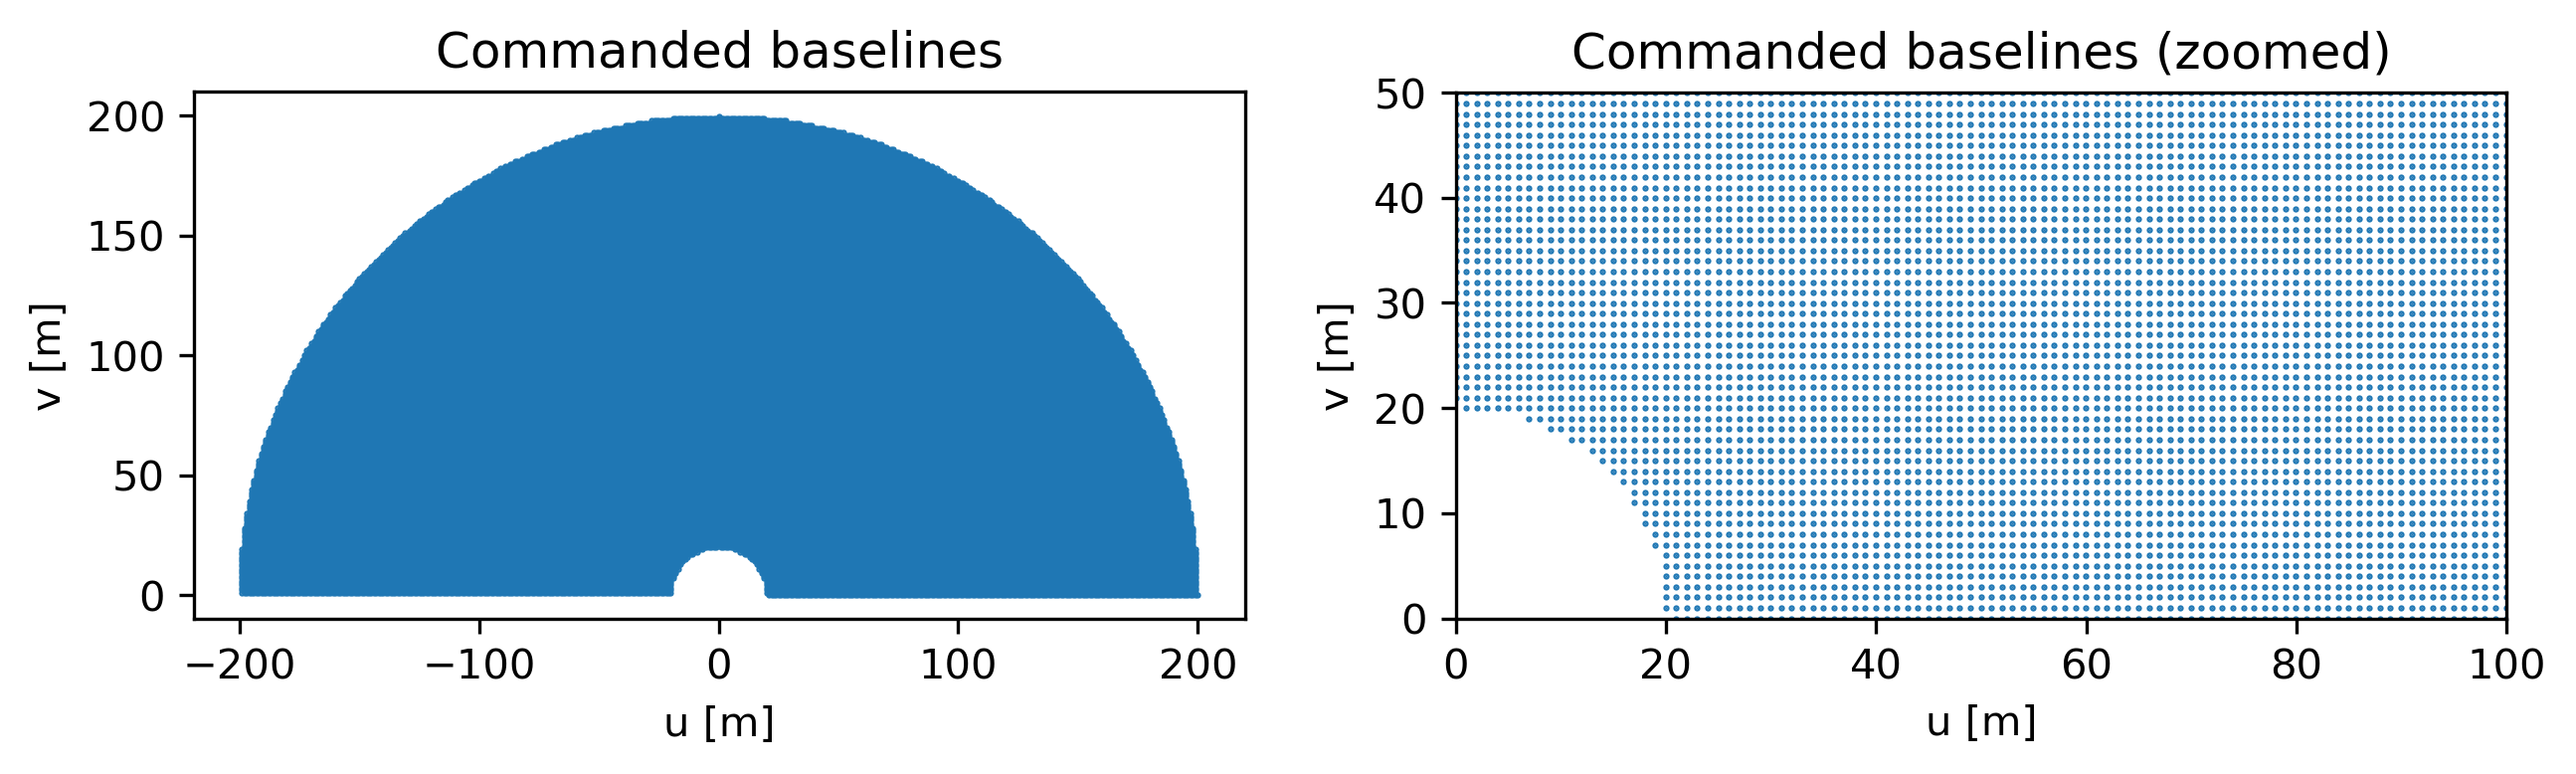

In [4]:
fig,ax = plt.subplots(1,2,dpi=300,figsize=[10,3])

for i in [0,1]:
    ax[i].plot(AA.commanded[:,0],AA.commanded[:,1],'.',markersize=1)
    ax[i].set_aspect('equal')
    ax[i].set_xlabel('u [m]')
    ax[i].set_ylabel('v [m]')

ax[0].set_title('Commanded baselines')
ax[1].set_title('Commanded baselines (zoomed)')
ax[1].set_xlim([0,100])
ax[1].set_ylim([0,50])

For demonstration purposes, let's run a case with fewer commanded points.

In [5]:
AA_small = AntArray(max_bl_lambda=30)

(0.0, 50.0)

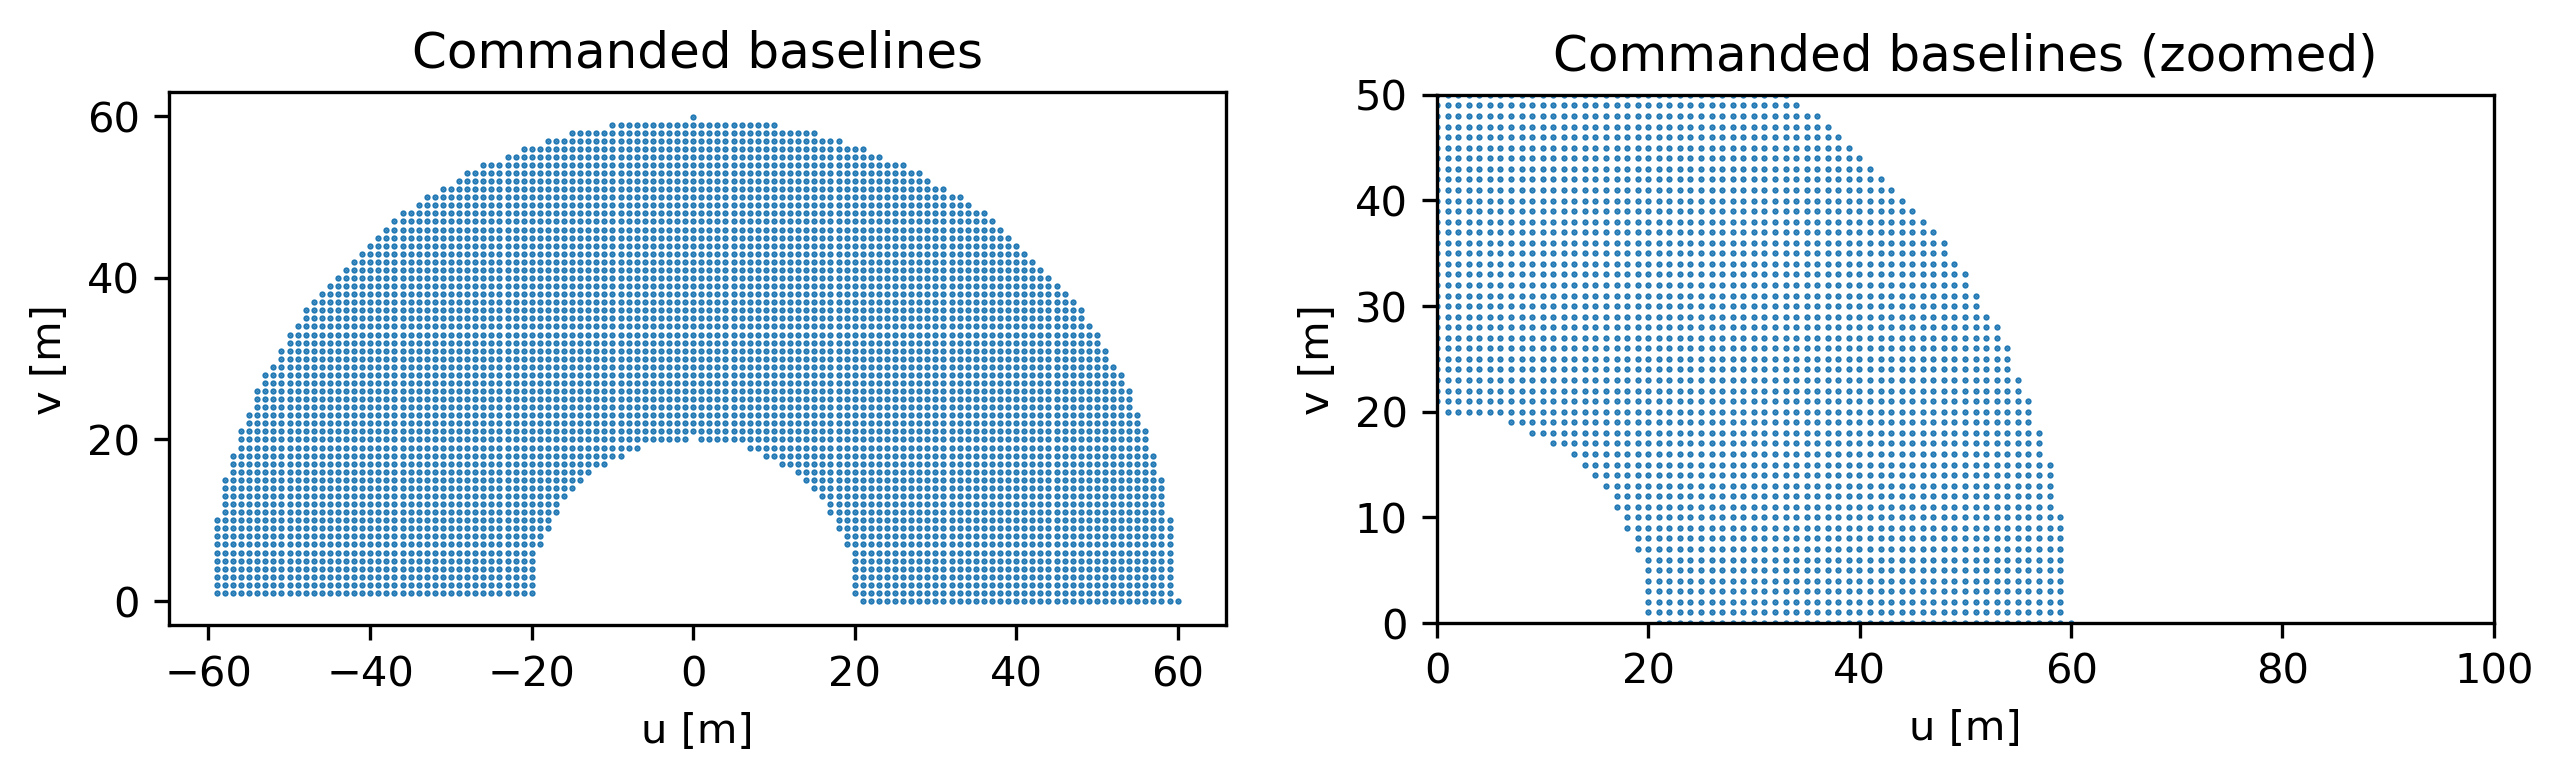

In [6]:
fig,ax = plt.subplots(1,2,dpi=300,figsize=[10,3])

for i in [0,1]:
    ax[i].plot(AA_small.commanded[:,0],AA_small.commanded[:,1],'.',markersize=1)
    ax[i].set_aspect('equal')
    ax[i].set_xlabel('u [m]')
    ax[i].set_ylabel('v [m]')

ax[0].set_title('Commanded baselines')
ax[1].set_title('Commanded baselines (zoomed)')
ax[1].set_xlim([0,100])
ax[1].set_ylim([0,50])

The next cell contains the command to run the algorithm. It can be called as a method from an `AntArray` instance, or you can import the function `from uvrules.algos.rules import add_ant_rules` and call `add_ant_rules(AA, ...)`.

Here are the parameters (all optional):

 - `commanded_order (int, either 1, -1, or 0)`: order in which to try and fulfill the commanded baselines. `1` = from shortest to longest. `-1` is the opposite. `0` is random. Only matters if `compare_all_commanded` is `False.
 - `antpos_order (int, either 1, -1, or 0`: order that determines which is the next reference antenna used. `1` = the one closest to origin. `-1` is the opposite. `0` is random. Only matters if `compare_all_antpos` is False.
 - `compare_all_commanded (bool)`: whether or not to compare all the commanded baselines at each iteration. Not recommended; it's computationally very costly, and doesn't improve the array much.
 - `compare_all_antpos (bool)`: whether or not to compare all the candidate reference antennas at each iteration. Recommended; each step is a bit slower at the beginning, but since the array requires fewer antennas in the end, it converges faster.
 - `max_array_size (float or None)`: maximum size of the array; if None, no max. If the maximum is finite, it's possible that the algorithm halts before fulfilling all baselines (array too full).
 - `center_at_origin (bool)`: whether to enforce the maximum size of the array as a distance from `(0,0)` (faster), or as the maximum distance between any two antennas (less restrictive).
 - `n_max_antennas (int)`: self explanatory; default is -1, which is equivalent to no maximum. If `n_max_antennas` is some positive integer, it's possible that the algorithm halts before fulfilling all baselines (too many antennas).
 - `n_to_add (int)`: similar to `n_max_antennas`, but you use it e.g. if your `AntArray` instance already has some antennas, and you want to add a finite number.
 - `minimize_array_size (bool)`: if True, and if either `compare_all_antpos` or `compare_all_commanded` is also True, and two {a_ref,u_C} candidates happen to fulfill the same number of baselines, will favor the one that minimizes the array size.
 - `maximize_antenna_spacing (bool)`: similar to `minimize_array_size`, but will favor the one that places the new antenna furthest from all others. If both are true, `minimize_array_size` will override `maximize_antenna_spacing`.
 - `save_file (bool)`: whether or not to save the file at each step (including at the end). Useful if running a very large array.
 - `path_to_file (str or None)`: path to the save file, including file name (ending in `.pkl`). Default = (timestamped).pkl in working directory.
 - `verbose (bool)`: self explanatory, recommended.
 - `show_plot (bool)`: whether to show the array, remaining antennas, and some stats as the algorithm is running. Only tested in a jupyter notebook. May slow things down a bit.
 - `additional_output (str or None)`: any additional string you want to print out at each step (e.g. time of day, or else).
 - `num_core (int or None)`: number of CPU cores to use. If `None`, computes how many are available by the Python instance and uses them all.
 - `log_path (str or None)`: path to log status updates (useful if running from console, e.g. remotely).

In [7]:
AA_small.add_ant_rules(
    commanded_order = 1,
    compare_all_commanded = False,
    compare_all_antpos = True,
    verbose = True,
    save_file = False,
    show_plot = False,)

[2025-12-15 17:04:54]
📡 Antennas in array: 395
Last antenna placed: (140.90 m , -105.93 m)
✅ # uv points fulfilled: 5016/5016
🗄️ # uv points remaining: 0/5016
🆕 # uv points fulfilled at last step: 2
📈 efficiency: 0.25
⏳ last step: 00:00:01.05
⌛ total time: 00:06:29.53
----------------------------------------
Done.


The cell above took about 6.5 minutes when running on a modern laptop with 12 CPU cores.

Let's try it again, this time with `show_plot = True`. There will be a 4x4 plot (re-)generated at each iteration. Top and bottom left show the commanded points and the antenna positions, respectively, colored by their (normalized) rank, i.e., the first antenna placed has rank 0 and the last antenna placed has rank 1. Top and bottom right show algorithmic statistics.

Here, we call `add_ant_rules()` on its own, instead of as a method from `AntArray`. Both work.

[2025-12-15 17:14:07]
📡 Antennas in array: 395
Last antenna placed: (140.90 m , -105.93 m)
✅ # uv points fulfilled: 5016/5016
🗄️ # uv points remaining: 0/5016
🆕 # uv points fulfilled at last step: 2
📈 efficiency: 0.25
⏳ last step: 00:00:01.09
⌛ total time: 00:06:40.31
----------------------------------------


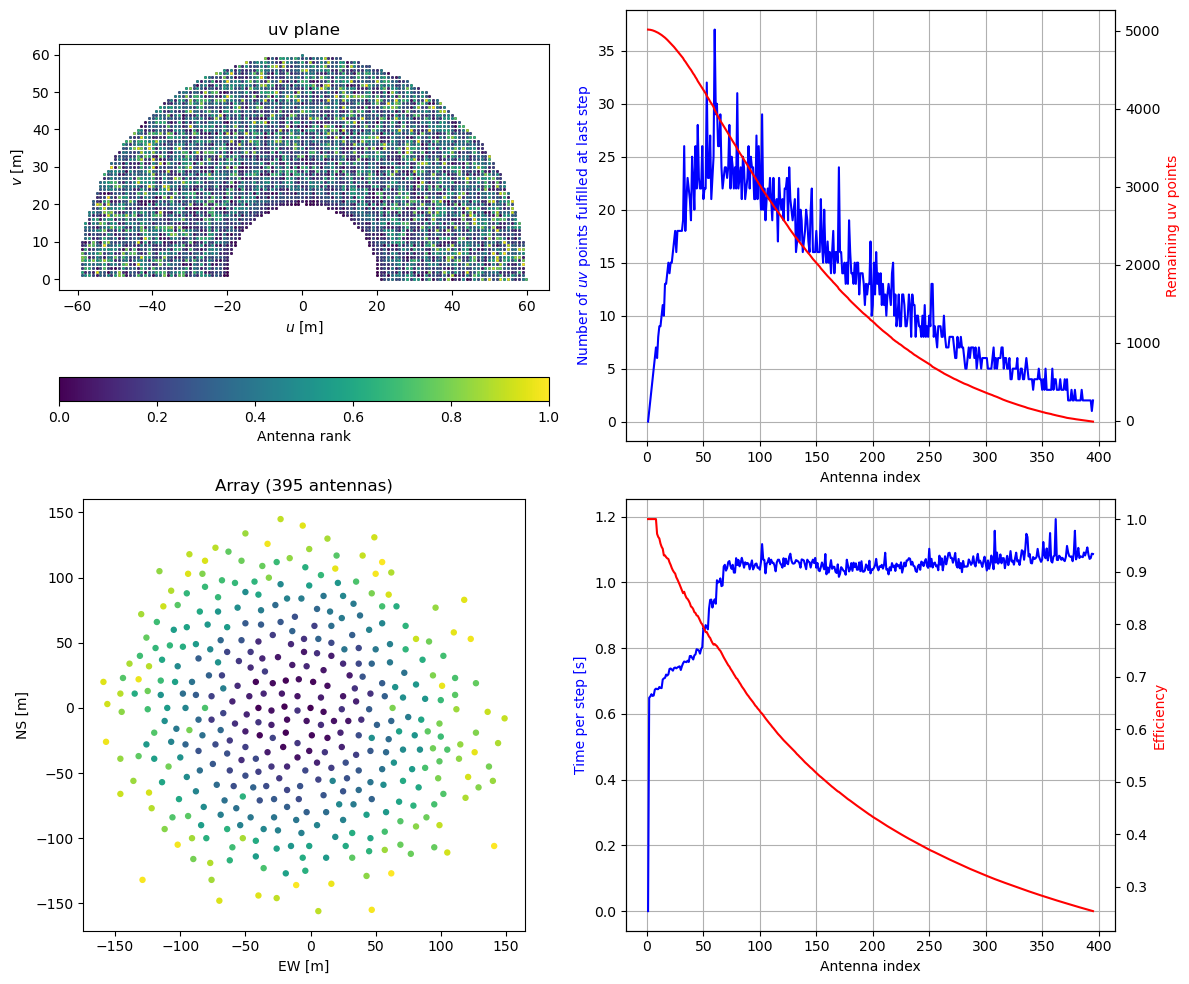

Done.


In [8]:
AA_small_2 = AntArray(max_bl_lambda=30)

add_ant_rules(AA = AA_small_2,
    commanded_order = 1,
    compare_all_commanded = False,
    compare_all_antpos = True, 
    save_file = False,
    show_plot = True,)

As of the writing of this notebook, the `AntArray` class does not export the array in a common format used by visibility simulators.
The user will have to write their own routine, starting from the numpy array `AA.antpos`, which has shape `(n,2)`, and contains floats meant to be interpreted in units of meters.